In [5]:
from globals import *
from spasm import *
from plot import *
import itertools
from count import *

G = spasm(P5, pure = True)

[<networkx.classes.graph.Graph object at 0x000001EFC74F1900>, <networkx.classes.graph.Graph object at 0x000001EFC74F1990>, <networkx.classes.graph.Graph object at 0x000001EFC74F00A0>, <networkx.classes.graph.Graph object at 0x000001EFC74F0040>, <networkx.classes.graph.Graph object at 0x000001EFC74F1570>, <networkx.classes.graph.Graph object at 0x000001EFC74F15D0>, <networkx.classes.graph.Graph object at 0x000001EFC74F2DA0>, <networkx.classes.graph.Graph object at 0x000001EFC74F2D40>, <networkx.classes.graph.Graph object at 0x000001EFC74F3C70>, <networkx.classes.graph.Graph object at 0x000001EFC74F3C40>, <networkx.classes.graph.Graph object at 0x000001EFC74F3CD0>, <networkx.classes.graph.Graph object at 0x000001EFC74F2E60>, <networkx.classes.graph.Graph object at 0x000001EFC74F2EC0>, <networkx.classes.graph.Graph object at 0x000001EFC74F2F50>, <networkx.classes.graph.Graph object at 0x000001EFC74F2E90>]


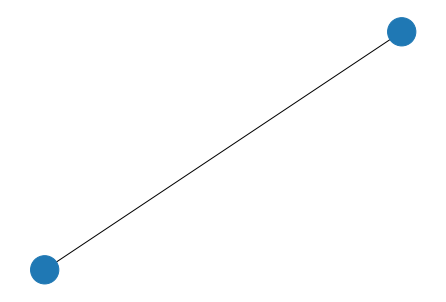

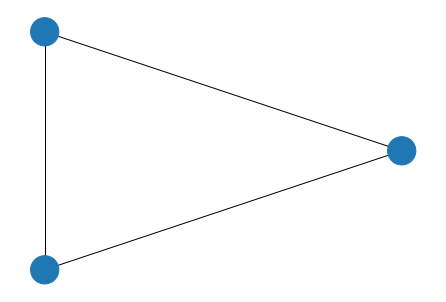

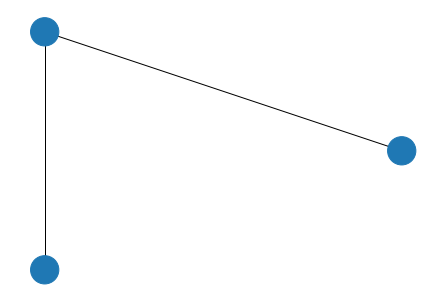

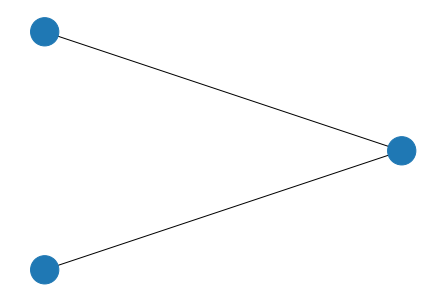

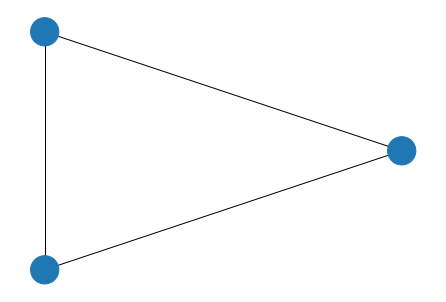

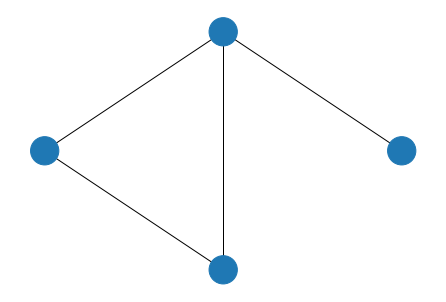

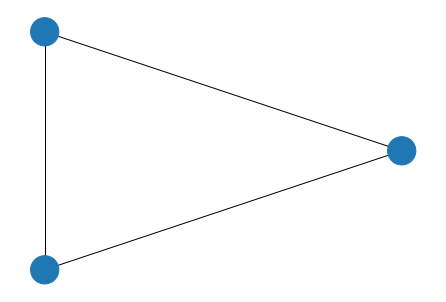

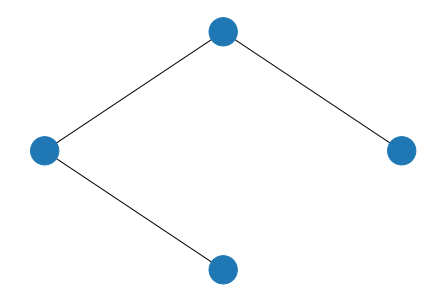

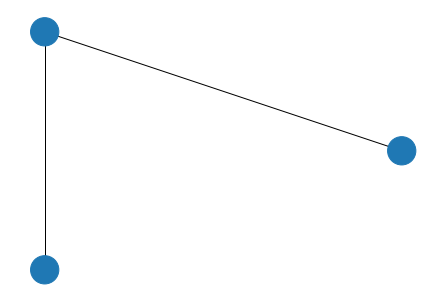

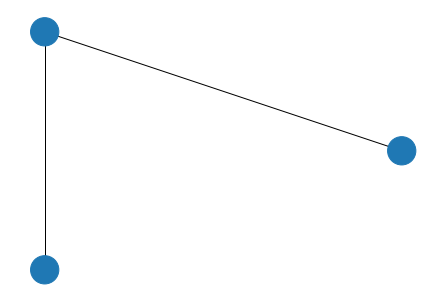

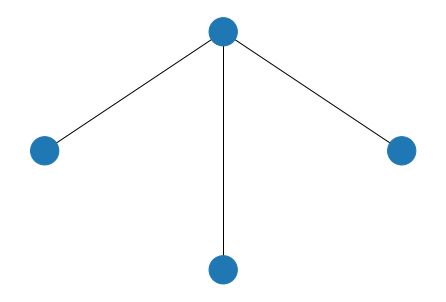

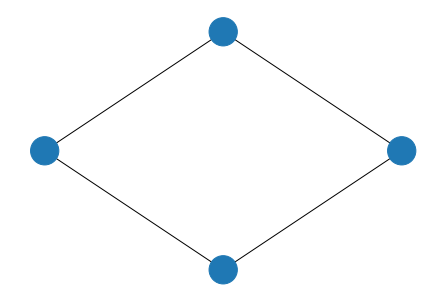

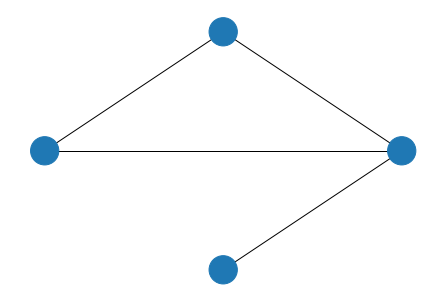

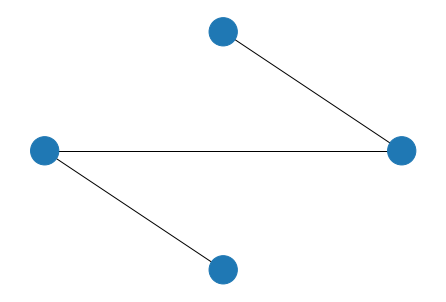

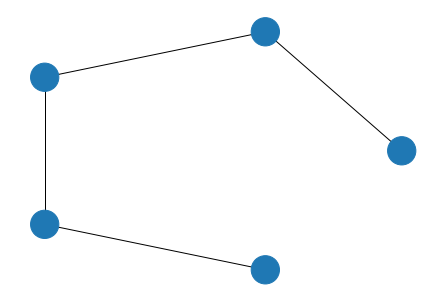

In [8]:

# SPASM
# ----------------------------------------------------------------
# Imports
from collections import Counter
import networkx as nx
from globals import *

def spasm(G, pure = False):
    """ returns a list of all spasm graphs of the input graph."""
    """ Does not return the graph itself."""
    
    # Base Case
    if nx.is_isomorphic(G, nx.complete_graph(2)) or nx.is_isomorphic(G, nx.complete_graph(3)):
        return [G]
    
    n = G.number_of_nodes()
    spasms = [[[i] for i in range(n)]]

    G.graph["p"] = [1 for i in range(n)]
    
    # Generate
    for i in range(n - 1):
        for j in range(i + 1, n):
            new_spasms = []
            for s in spasms:
                
                # edge exists
                edge = False
                for x in s[i]:
                    for y in s[j]:
                        if (x,y) in G.edges():
                            edge = True
                if not edge:
                    new = s.copy()
                    var = list(set(s[i] + s[j]))
                    s[i], s[j] = var, var
                    new_spasms.append(new)
            spasms += new_spasms       
    
    
    
    ret = []
    # remove duplicate blocks
    for s in spasms:
        keeps = []
        for i in range(len(s)):
            keep = True
            for j in range(len(s)):
                if i != j and ( set(s[i]) < set(s[j]) ):
                    keep = False
            if keep:
                keeps.append(s[i])
        new_k = []
        for elem in keeps:
            if elem not in new_k:
                new_k.append(elem)
        ret.append(new_k)

    
    new_k = []
    for r in ret:
        #print("======")
        #print(ret[i])
        if not (sorted(r) in new_k):
            new_k.append(sorted(r))
    #print(new_k)
    # create respective graphs
    
    final = []
    for r in new_k:
        G_new = G.copy()
        for elem in r:
            if len(elem) > 1:
                try:
                    for e in elem[1:]:
                        G_new = nx.contracted_nodes(G_new, elem[0], e)
                    G_new.graph["p"] = [len(i) for i in r]
                except:
                    pass
        final.append(G_new)
    
    rel = []
    for f in final:
        mapping = dict(zip(f, range(f.number_of_nodes())))
        
        rel.append(nx.relabel_nodes(f, mapping))
    return rel

S = spasm(P5)
print(S)
for s in S:
    plot_graph(s)


In [7]:
H = P5
spa = spasm(H)
for s in spa:
    print(s)
    print(s.nodes())
    print(s.graph["p"])
G1 = K5
G2 = P5 
G3 = K6

B = Hom(H, G2)

C = 0

for s in spa:
    C += Emb(s, G2)

print(B, C)


Graph with 2 nodes and 1 edges
[0, 1]
[3, 2]
Graph with 3 nodes and 3 edges
[0, 1, 2]
[2, 2, 1]
Graph with 3 nodes and 2 edges
[0, 1, 2]
[1, 2, 2]
Graph with 3 nodes and 2 edges
[0, 1, 2]
[3, 1, 1]
Graph with 3 nodes and 3 edges
[0, 1, 2]
[2, 2, 1]
Graph with 4 nodes and 4 edges
[0, 1, 2, 3]
[1, 2, 1, 1]
Graph with 3 nodes and 3 edges
[0, 1, 2]
[2, 1, 2]
Graph with 4 nodes and 3 edges
[0, 1, 2, 3]
[1, 1, 2, 1]
Graph with 3 nodes and 2 edges
[0, 1, 2]
[2, 2, 1]
Graph with 3 nodes and 2 edges
[0, 1, 2]
[2, 2, 1]
Graph with 4 nodes and 3 edges
[0, 1, 2, 3]
[1, 2, 1, 1]
Graph with 4 nodes and 4 edges
[0, 1, 2, 3]
[2, 1, 1, 1]
Graph with 4 nodes and 4 edges
[0, 1, 2, 3]
[2, 1, 1, 1]
Graph with 4 nodes and 3 edges
[0, 1, 2, 3]
[2, 1, 1, 1]
Graph with 5 nodes and 4 edges
[0, 1, 2, 3, 4]
[1, 1, 1, 1, 1]
42 42


False


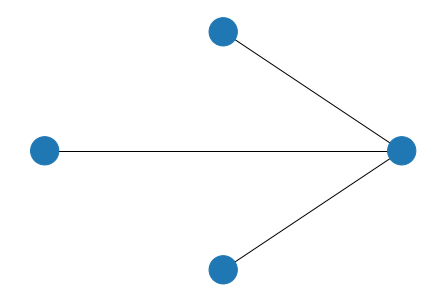

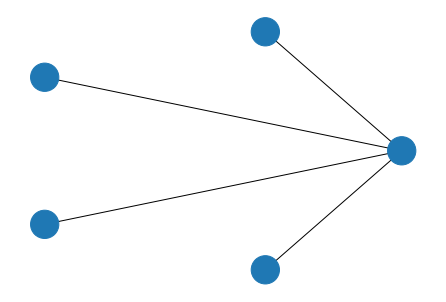

In [16]:
C4 = nx.from_edgelist([(0,1), (1,2), (2,3), (3,0)])
## Stars
S3 = nx.from_edgelist([(0,1), (0,2)])
S4 = nx.from_edgelist([(0,1), (0,2), (0,3)])

print(nx.is_isomorphic(S4, nx.star_graph(4)))

plot_graph(S4)
plot_graph(nx.star_graph(3))
